In [26]:
import requests
filler_words = ["um", "uh", "hmm", "mhm", "uh huh", "ahh", "like", "you know"]

from flask import Flask
import datetime

app = Flask(__name__)

def read_file(filename, chunk_size=5242880):
    with open(filename, 'rb') as _file:
        while True:
            data = _file.read(chunk_size)
            if not data:
                break
            yield data
            
def get_url(filename): 
    headers = {'authorization': "8723d8b0c8104a8fa0f6c8487d79b26c"}
    response = requests.post('https://api.assemblyai.com/v2/upload',
                        headers=headers,
                        data=read_file(filename))
    return response.json()['upload_url']

@app.route('/time')
def get_current_time():
    return {'time': datetime.datetime.now()}

@app.route('/analyze')
def assembly_analysis(url):
    req_endpoint = "https://api.assemblyai.com/v2/transcript"
    
    req_json = {
        "audio_url": url,
        "sentiment_analysis": True,
        "disfluencies": True
    }
    req_headers = {
        "authorization": "8723d8b0c8104a8fa0f6c8487d79b26c",
        "content-type": "application/json"
    }
    req_response = requests.post(req_endpoint, json=req_json, headers=req_headers)
    # print(req_response.json())
    
    curr_id = req_response.json()['id']
    status = ''

    while status != 'completed': 
        check_endpoint = f'https://api.assemblyai.com/v2/transcript/{curr_id}'
        check_headers = {
            # "authorization": "YOUR-API-TOKEN",
            "authorization": "8723d8b0c8104a8fa0f6c8487d79b26c",
        }
        check_response = requests.get(check_endpoint, headers=check_headers)
        status = check_response.json()['status']

    text = check_response.json()['text']
    sentiment = check_response.json()['sentiment_analysis_results']
    #print(check_response.json())
    return [text, sentiment]

In [29]:
result = assembly_analysis(get_url('7510.wav'))

In [10]:
from scipy.io.wavfile import read #import the required function from the module
import matplotlib.pyplot as plt
import numpy as np

def graph_amplitude(file_path): 
    samplerate, data = read(file_path)
    # samplerate #echo samplerate
    # data #echo data -> note that the data is a single dimensional array
    duration = len(data)/samplerate
    time = np.arange(0,duration,1/samplerate) #time vector
    
    plt.plot(time,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('7510.wav')
    plt.show()

In [11]:
import soundfile as sf
import pyloudnorm as pyln

def loudness_unit(file_path): 
    data, rate = sf.read(file_path)
    meter = pyln.Meter(rate) 
    # Loudness Unit Full Scale 
    # The less negative the value, the higher the average level.
    # -9 to -13 is the ideal range
    loudness = meter.integrated_loudness(data)
    return loudness

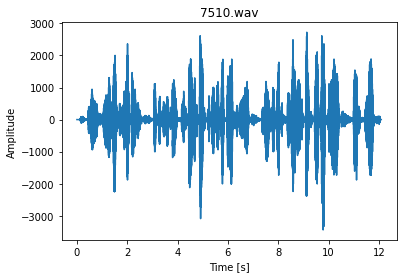

In [12]:
graph_amplitude('7510.wav')

In [13]:
loudness_unit('7510.wav')

-39.41070989102504

In [14]:
def count_filler(result):
    filler_count = 0
    for word in filler_words:
        if word in result:
            filler_count += 1
    return filler_count

In [30]:
count_filler(result[0])

3

In [31]:
sentiment = result[1]
sentiment

[{'text': 'You know, demons on TV like that and and for people to expose themselves to being rejected on TV or, you know, humil humiliated by Fear Factor or, um, you know,',
  'start': 550,
  'end': 11760,
  'sentiment': 'NEGATIVE',
  'confidence': 0.7364895343780518,
  'speaker': None}]

In [32]:
result

['You know, demons on TV like that and and for people to expose themselves to being rejected on TV or, you know, humil humiliated by Fear Factor or, um, you know,',
 [{'text': 'You know, demons on TV like that and and for people to expose themselves to being rejected on TV or, you know, humil humiliated by Fear Factor or, um, you know,',
   'start': 550,
   'end': 11760,
   'sentiment': 'NEGATIVE',
   'confidence': 0.7364895343780518,
   'speaker': None}]]